# <a id='toc1_'></a>[News_NLP](#toc0_)

This notebook is to demonstrate how to use News-NLP pacakge. `pip install  news-nlp`

https://pypi.org/project/news-nlp/

**Table of contents**<a id='toc0_'></a>    
- [News_NLP](#toc1_)    
- [Section 1](#toc2_)    
  - [Import libraries](#toc2_1_)    
  - [Load Sample Data](#toc2_2_)    
  - [Clean Data](#toc2_3_)    
  - [Cateriose News articles into seven predefined classes.](#toc2_4_)    
  - [Sentiment Classifier](#toc2_5_)    
  - [Statitical Hierarchy Model and Multi_Geolocator](#toc2_6_)    
  - [Merge outputs](#toc2_7_)    
  - [Finalise Multiple News Articles](#toc2_8_)    
- [Section 2](#toc3_)    
  - [Load data](#toc3_1_)    
  - [Clean data](#toc3_2_)    
  - [Implement unified classifier on single news](#toc3_3_)    
  - [Implement Sentiment Classifier](#toc3_4_)    
  - [Geolocate news article and implement stastical hierarchy model](#toc3_5_)    
  - [Finalise](#toc3_6_)    
- [Additionally](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

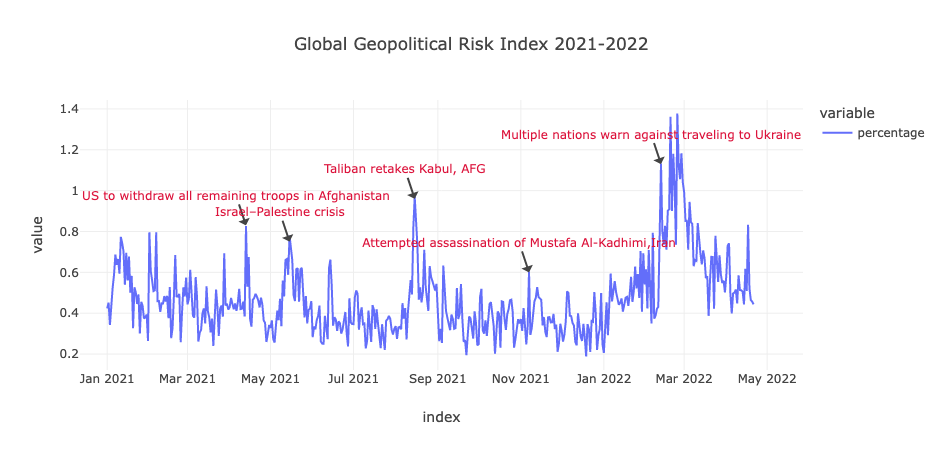

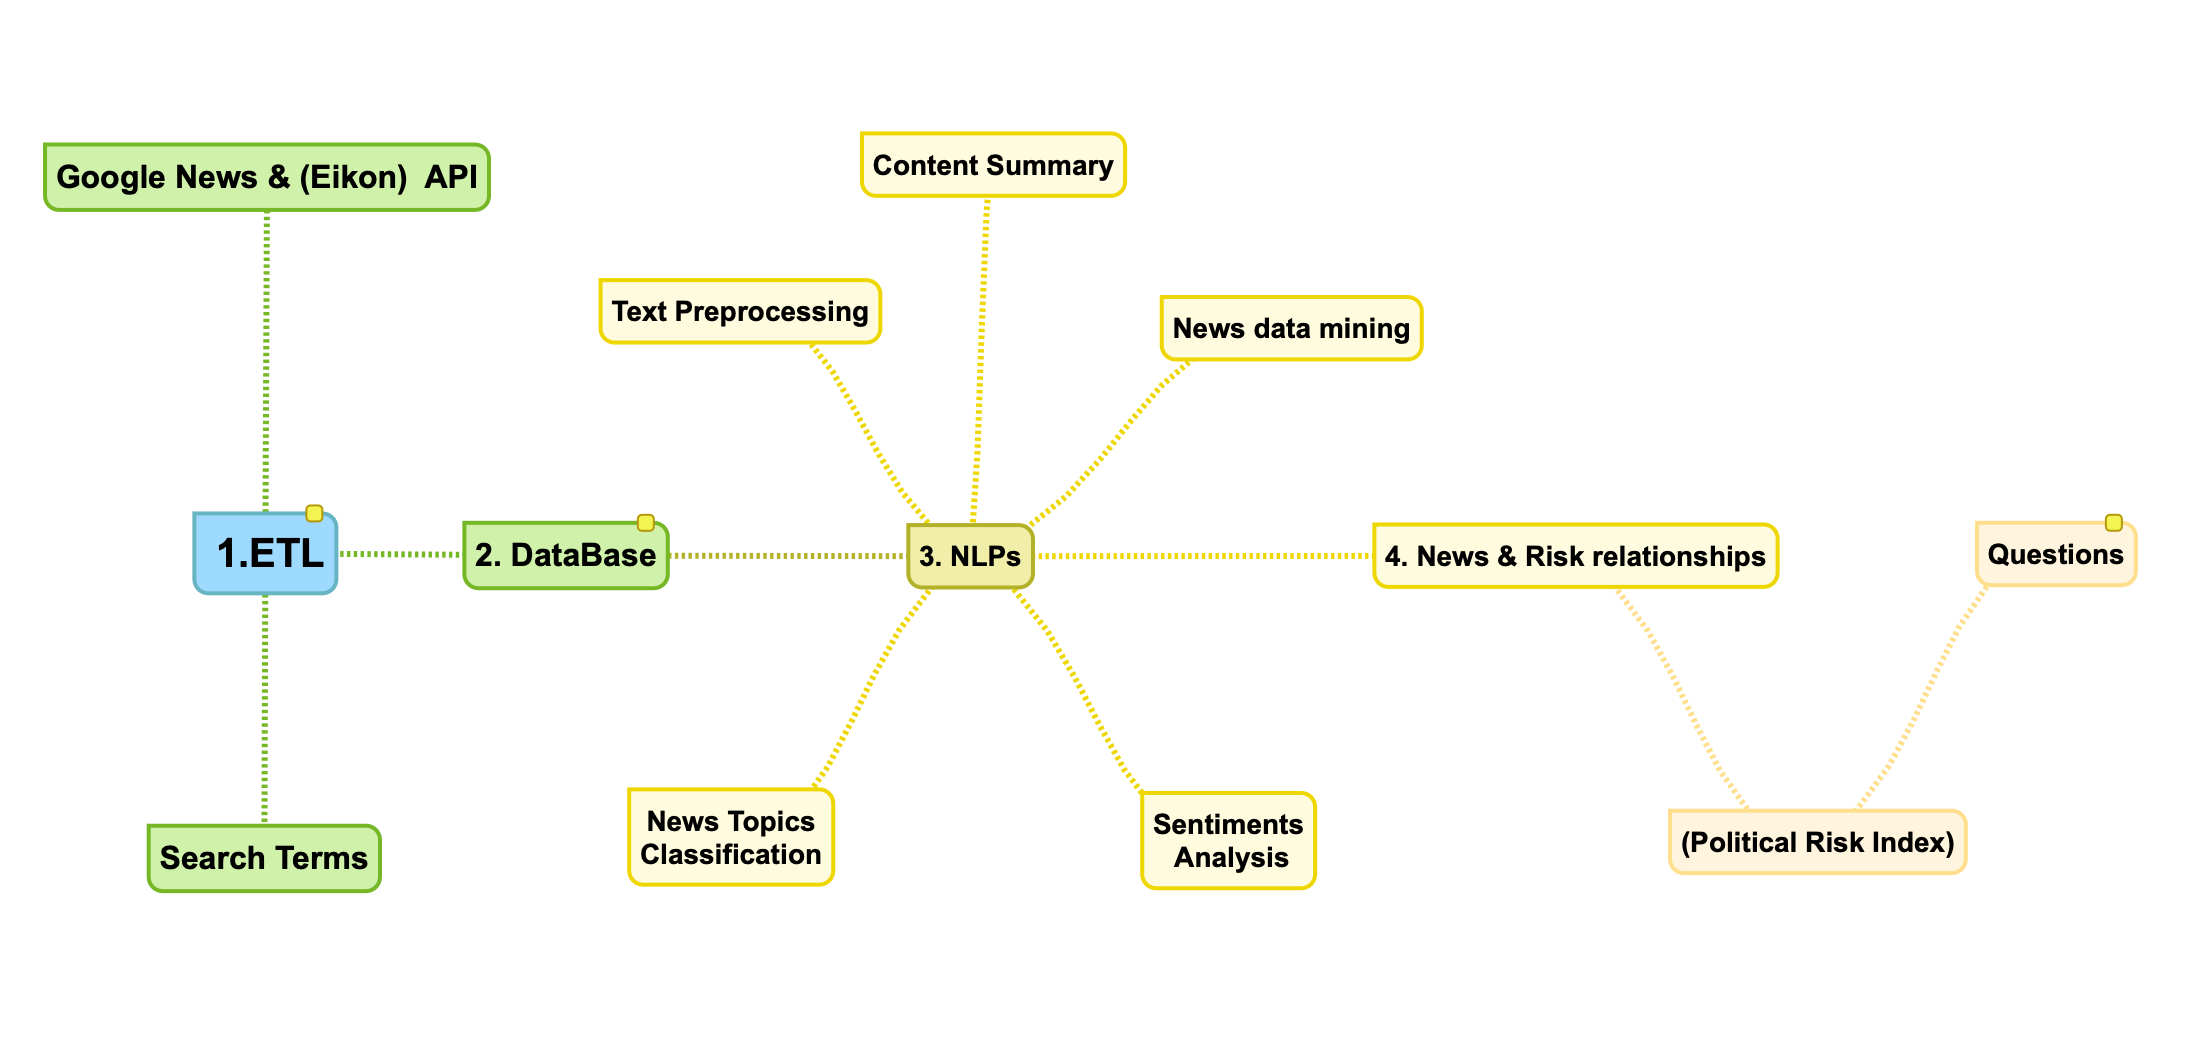

**BackGround**

Financial institutions concerns geopolitical risk and ESG risk (adverse news) while taking overseas investment, this project is developed to monitor real-time risk based on news articles.

Key Steps:

1. Develop methodology to measure GPR index, work closely with research team

$$Y = \beta_1 X_{\text{numofnews}} + \beta_2 X_{\text{sentiment\_strength}} + \beta_3 X_{\text{population}} + \beta_4 X_{\text{news_topics}} + \beta_5 X_{\text{location_type}}$$

- News topics include `foreign policy`, `conflict`, `terror threat`, `corruption`, `environment`, `social`, `governance`

2. Identify `search terms` using TFIDF approach from 100 sample news articles per topic, together with fine-tune a word embedding model get synonyms of key words and bigrams.

3. Make` ML/NLP classifier` to categorise news articles into seven predefined classes

4. Create `Stastical Hierachary model` to predict news event location and a `multiple geolocator` to get latitude, and longitude and polulation.

5. Prepare an ETL pipeline for software engineer, wrapper in pip package




In [1]:
! pip install  news-nlp -U -q

* Fetch news articles from Google News API, `from News_NLP.GNews import GNews`
* Preproces news data for sentiment analysis and news type classifier, 
`from News_NLP.preprocessing import Preprocessing_Clf_SA`

* Preproces news data for multiple-geolocator 
`from News_NLP.preprocessing import Preprocessing_GEO`

* Implement pretrained deep leanring model to caterise news article 
`from News_NLP.gpr_classifier import GPR_Clf`

* Perform sentiment classifier `from News_NLP.sentiment_clf import Sen_Clf`,
* Implement multiple geolocator News_NLP.geolocator `import Get_CSC_Prob, CSC_Prob`,

# <a id='toc2_'></a>[Section 1](#toc0_)

Inputs is a transformed multiple news in dataframe

## <a id='toc2_1_'></a>[Import libraries](#toc0_)

In [2]:
import os
import gdown
import pandas as pd

from News_NLP.GNews import GNews
from News_NLP.preprocessing import Preprocessing_Clf_SA, Preprocessing_GEO,Combine_Col
from News_NLP.gpr_classifier import GPR_Clf
from News_NLP.sentiment_clf import Sen_Clf
from News_NLP.geolocator import Get_CSC_Prob, CSC_Prob

# disable warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /Users/jason/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/jason/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/jason/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/jason/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /Users/jason/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/jason/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/jason/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jason/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-da

In [1]:
# # %%capture
%load_ext watermark
%watermark -a "Jason Lu" -e "luzhenxian@hotmail.com" -u -d -p pandas,spacy,cliff

Author: Jason Lu

Email: luzhenxian@hotmail.com

Last updated: 2023-04-04

pandas: 1.5.3
spacy : 3.5.1
cliff : 2.6.1



## <a id='toc2_2_'></a>[Load Sample Data](#toc0_)

This sample dataset is orginally fetched from Google News API, and duplicate rows are dropped.

In [6]:
os.path.isfile(sample_data_path)

False

In [9]:
pwd

'/Users/jason/Documents/GitHub/News_NLP/notebooks'

In [13]:
# if sample dataset does not exist, download it
url = 'https://drive.google.com/file/d/1dwZDMqJUtJiAFrq378SMiAVssGOY57eC/view?usp=share_link'
sample_data_path ='data/SampleNews.csv'

if os.path.isfile(sample_data_path)==False:  
    gdown.download(url, output=sample_data_path,quiet=False,fuzzy=True)
else:

    pass

data = pd.read_csv(sample_data_path,index_col=0)

In [14]:
data.head(2)

,news_id,source_name,author,title,content,description,publishedAt,search_term,url
0,fcfe84da95d74daaa0187fe80c649fce,India Today,NaN,‘Jungle raj’ prevails in TMC-ruled Bengal: BJP...,A BJP fact-finding team on Saturday said 'Jung...,A BJP fact-finding team has said 'jungle raj' ...,2022-09-17T16:49:37Z,corrupt,https://www.indiatoday.in/india/story/jungle-r...
1,54c7e3222f1c477ea0818ac260e3d3dd,YLE News,NaN,Court fines non-commissioned officer for threa...,Satakunta District Court has fined a non-commi...,The 22-year-old defendant regularly used racis...,2022-09-02T14:06:14Z,kill,https://yle.fi/news/3-12607133


In [15]:
# list unique search terms
list(data.search_term.unique())

['corrupt',
 'kill',
 'carbon',
 'corruption',
 '"foreign policy"',
 '"anti corruption"',
 '"natural gas"',
 '"green energy"',
 '"political party"',
 'farmer',
 '"central bank"',
 '"corporate governance"',
 'authoritarian',
 'army',
 '"risk management"',
 'disaster',
 '"electric vehicle"',
 'rivers',
 '"renewable energy"',
 '"power plant"',
 '"decision making"',
 '"nuclear power plant"',
 'conflict',
 'dictatorial',
 '"global warming"',
 'protest',
 '"rights abuses"',
 'society',
 '"federal government"',
 '"secretary general"',
 'governance',
 '"attorney general"',
 '"opposition leader"',
 'battle',
 '"air quality"',
 '"child care"',
 'welfare',
 'racism',
 '"foreign affairs"',
 '"tear gas"',
 'coast',
 '"security council"',
 '"climate change"',
 '"air pollution"',
 '"economic growth"',
 '"military operation"',
 'waters',
 '"minimum wage"',
 '"high court"',
 'farms',
 '"public health"',
 'diplomatic',
 '"civil war"',
 '"international community"',
 '"carbon footprint"',
 'protester',
 '

The search terms is the input of Google News API. There are identified using NLP TFIDF method and word embedding model, and are cateorised into different groupd in line with news topics.

Alternatively, dataset can also be downloaded using `News_NLP.GNews`, however, Developer accounts are limited to 100 requests over a 24 hour period (50 requests available every 12 hours), Therefor one needs to register news account, https://newsapi.org/docs/client-libraries/python

In [4]:
# news = GNews()

In [16]:
data.shape

(1000, 9)

In [17]:
data.columns

Index(['news_id', 'source_name', 'author', 'title', 'content', 'description',
       'publishedAt', 'search_term', 'url'],
      dtype='object')

## <a id='toc2_3_'></a>[Clean Data](#toc0_)

* `Preprocessing_Clf_SA()`: clean data for news type classfier and sentiment classifier
* `Preprocessing_GEO()`: clean data for multiple geolocator,

The cleaning process includes removing stop words, uninformative words, some punctuations and unstructrued characters

In [18]:
# merge news title, description and content
data = Combine_Col(data, 'title', 'description')
data = Combine_Col(data, 'title_description','content')
data.drop(['title_description'],axis=1, inplace=True)

# clean news articles for classifiers and geolocator
data['TDC_Clf_SA'] = data['title_description_content'].progress_apply(lambda x : Preprocessing_Clf_SA(x))
data['TDC_Geo'] = data['title_description_content'].progress_apply(lambda x : Preprocessing_GEO(x))
# sort values
data.sort_values(by='publishedAt',ascending=False, inplace=True)
# drop duplicate rows, just in case
data.drop_duplicates('url', keep='first',inplace=True)
data.drop_duplicates('content', keep='first',inplace=True)
data.reset_index(inplace=True, drop=True)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [19]:
data.head(2)

,title_description_content,news_id,source_name,author,title,content,description,publishedAt,search_term,url,TDC_Clf_SA,TDC_Geo
0,The Burkina strongman kicked out in a coup. On...,3e475d9e1f78432b9e5fdc66dbe22531,FRANCE 24 English,FRANCE24,The Burkina strongman kicked out in a coup,Ouagadougou (AFP) Burkina Faso strongman Lieut...,On Friday military officials said they had rem...,2022-09-30T23:12:23Z,coup,https://www.france24.com/en/live-news/20220930...,the burkina strongman kicked coup friday milit...,"The Burkina strongman kicked out in a coup, On..."
1,"China, India and Brazil abstain in vote on US ...",78f08bc1709546dbb11857167fbf3e30,RT,RT,"China, India and Brazil abstain in vote on US ...",Russia has accused the US of baiting it into u...,Russia accused the US of pushing it to use its...,2022-09-30T21:57:17Z,"""security council""",https://www.rt.com/news/563837-russia-security...,china india brazil abstain vote resolution rus...,"China, India and Brazil abstain in vote on U.S..."


In [20]:
data.TDC_Clf_SA[0][:1000]

'the burkina strongman kicked coup friday military official said removed head junta second coup year damiba firsthand experience brutal jihadist insurgency cited pretext seizing power january but wasnt enough placate rebelling military tore record security announced dismissal national television address when damibas junta overthrew country elected president roch marc christian kabore latter facing anger failure stem crisis since first jihadist attack thousand people died two million displaced fighting during eight month head junta damiba tried launch process dialogue armed group intensifying offensive action army early september damiba welcomed relative calm several place but attack remained numerous percent country outside government control before taking power damiba made secret criticism prevailing strategy roll back insurgency publishing book last june called west african armies terrorism uncertain answers part group uniformed men mounted coup january declaring taken power although

In [21]:
data.TDC_Geo[0][:1000]

'The Burkina strongman kicked out in a coup, On Friday military officials said they had removed him as head of the junta in the second coup this year, Damiba had first-hand experience with the brutal jihadist insurgency that he cited as the pretext for seizing power in January, But it was enough to placate the rebelling military, who tore into his record on security as they announced his dismissal in a national television address, When Damiba junta overthrew the country elected president, Roch Marc Christian Kabore, the latter too was facing anger over his failure to stem the crisis, Since the first jihadist attacks in, thousands of people have died and about two million have been displaced by the fighting, During his eight months at the head of the junta, Damiba tried to launch a process of dialogue with some armed groups, while intensifying the offensive actions of the army, In early September, Damiba welcomed a relative calm in several places, But the attacks have remained numerous,

By comparing the output of these two preprocessor, we can see that the latter still contains comma, hyphen, dot and some stop words, since the geolocator needs the preposition words to recognise locations.

## <a id='toc2_4_'></a>[Cateriose News articles into seven predefined classes.](#toc0_)

Class code and news topic name

|class|name|
|--|--|
|0|non-GPR|
|1|Conflict|
|2|Terror Threat|
|3|Corruption|
|4|Social|
|5|Governance|
|6|~~Water~~|
|7|~~Land~~|
|8|~~Air~~|
|9|Foreign Policy|
|10|Environment|

Class 6, 7, 8 are excluded

In [22]:
data.head(2)

,title_description_content,news_id,source_name,author,title,content,description,publishedAt,search_term,url,TDC_Clf_SA,TDC_Geo
0,The Burkina strongman kicked out in a coup. On...,3e475d9e1f78432b9e5fdc66dbe22531,FRANCE 24 English,FRANCE24,The Burkina strongman kicked out in a coup,Ouagadougou (AFP) Burkina Faso strongman Lieut...,On Friday military officials said they had rem...,2022-09-30T23:12:23Z,coup,https://www.france24.com/en/live-news/20220930...,the burkina strongman kicked coup friday milit...,"The Burkina strongman kicked out in a coup, On..."
1,"China, India and Brazil abstain in vote on US ...",78f08bc1709546dbb11857167fbf3e30,RT,RT,"China, India and Brazil abstain in vote on US ...",Russia has accused the US of baiting it into u...,Russia accused the US of pushing it to use its...,2022-09-30T21:57:17Z,"""security council""",https://www.rt.com/news/563837-russia-security...,china india brazil abstain vote resolution rus...,"China, India and Brazil abstain in vote on U.S..."


In [23]:
# categorise news topics
gpr_data = GPR_Clf(data)

In [24]:
gpr_data.head(2)

,title_description_content,news_id,source_name,author,title,content,description,publishedAt,search_term,url,TDC_Clf_SA,TDC_Geo,pred_class
0,The Burkina strongman kicked out in a coup. On...,3e475d9e1f78432b9e5fdc66dbe22531,FRANCE 24 English,FRANCE24,The Burkina strongman kicked out in a coup,Ouagadougou (AFP) Burkina Faso strongman Lieut...,On Friday military officials said they had rem...,2022-09-30T23:12:23Z,coup,https://www.france24.com/en/live-news/20220930...,the burkina strongman kicked coup friday milit...,"The Burkina strongman kicked out in a coup, On...",1
1,"China, India and Brazil abstain in vote on US ...",78f08bc1709546dbb11857167fbf3e30,RT,RT,"China, India and Brazil abstain in vote on US ...",Russia has accused the US of baiting it into u...,Russia accused the US of pushing it to use its...,2022-09-30T21:57:17Z,"""security council""",https://www.rt.com/news/563837-russia-security...,china india brazil abstain vote resolution rus...,"China, India and Brazil abstain in vote on U.S...",9


In [25]:
# class 0 non-gpr news articles are dropped
gpr_data.pred_class.unique()

array([ 1,  9,  4,  3,  5, 10,  2])

Now news articles are classified to 7 types.  `GPR_Clf()` implements a pretrained NLP deep learning model. Please contact the author if you are interested in how to make and optimmise this classifier.

## <a id='toc2_5_'></a>[Sentiment Classifier](#toc0_)

This step will classify news articles in to three sentiment classes, positive, netural and negative. In this pacakge, the sentiment classifier is trained in a DNN supervised learning model.

In [26]:
# implement sentiment classifier
gpr_sen_data =  Sen_Clf(gpr_data)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [27]:
gpr_sen_data.head(2)

,title_description_content,news_id,source_name,author,title,content,description,publishedAt,search_term,url,TDC_Clf_SA,TDC_Geo,pred_class,Symantic
0,The Burkina strongman kicked out in a coup. On...,3e475d9e1f78432b9e5fdc66dbe22531,FRANCE 24 English,FRANCE24,The Burkina strongman kicked out in a coup,Ouagadougou (AFP) Burkina Faso strongman Lieut...,On Friday military officials said they had rem...,2022-09-30T23:12:23Z,coup,https://www.france24.com/en/live-news/20220930...,the burkina strongman kicked coup friday milit...,"The Burkina strongman kicked out in a coup, On...",1,-0.9961
1,"China, India and Brazil abstain in vote on US ...",78f08bc1709546dbb11857167fbf3e30,RT,RT,"China, India and Brazil abstain in vote on US ...",Russia has accused the US of baiting it into u...,Russia accused the US of pushing it to use its...,2022-09-30T21:57:17Z,"""security council""",https://www.rt.com/news/563837-russia-security...,china india brazil abstain vote resolution rus...,"China, India and Brazil abstain in vote on U.S...",9,-0.9493


In [28]:
# check sentiment polarity
sentiment_strength = list(gpr_sen_data.Symantic)
max(sentiment_strength), min(sentiment_strength)

(0.9999, -0.9999)

The Symantic Columns is the sentiment strength ranging from -1 to 1. One indicates positive opinions of the news auther, Minus one show a negative.

## <a id='toc2_6_'></a>[Statitical Hierarchy Model and Multi_Geolocator](#toc0_)

`Get_CSC_Prob()` contains a Statitical Hierarchy Model and a Multi_Geolocator.  The Statitical Hierarchy Model will assign a probability to a location.  Multi_Geolocator will recoganise location name entities and geolocate them in terms of country code, location type, lat, lon and polupation and so on.

Cliff geoparse container must be started first

`docker pull rahulbot/cliff-clavin:2.6.1` 

`docker run -p 8080:8080 -m 8G -d rahulbot/cliff-clavin:2.6.1`

In [29]:
from cliff.api import Cliff

In [31]:
my_cliff = Cliff('http://0.0.0.0:8080')

* `myserver` is the bridge network IP of the Cliff container if this project is within a container, see README.md
* `myserver` is can be `0.0.0.0` if Cliff container is on local host

In [32]:
%%time
# it taks about one minute
df_Get_CSC_Prob = Get_CSC_Prob(gpr_sen_data,my_cliff)

  0%|          | 0/1000 [00:00<?, ?it/s]

CPU times: user 10.7 s, sys: 300 ms, total: 11 s
Wall time: 43.4 s


In [33]:
df_Get_CSC_Prob.head(5)

,LocationId,LocationName,CountryCode,FeatureCode,FeatureClass,CountryGeoNameId,StateCode,StateGeoNameId,Population,Longitude,Latitude,LocationTypeId,Frequency,Probability,news_id,LocatioTypeId
0,3017382,Republic of France,FR,PCLI,A,3017382,00,,66987244,2.0,46.0,3,4.0,0.1581,3e475d9e1f78432b9e5fdc66dbe22531,NaN
1,2988507,Paris,FR,PPLC,P,3017382,11,,2138551,2.3488,48.85341,1,4.0,0.1581,3e475d9e1f78432b9e5fdc66dbe22531,NaN
2,2361809,Burkina Faso,BF,PCLI,A,2361809,00,,19751535,-1.66667,12.5,3,4.0,0.7325,3e475d9e1f78432b9e5fdc66dbe22531,NaN
3,2425938,Sahel,,RGN,L,,,,389380000,2.46094,17.30869,RGN,NaN,NaN,3e475d9e1f78432b9e5fdc66dbe22531,NaN
4,2017370,Russian Federation,RU,PCLI,A,2017370,00,,144478050,100.0,60.0,3,18.0,0.7325,78f08bc1709546dbb11857167fbf3e30,NaN


![Getting Started](./data/GPR_index.png)

Once news events are inferred, dynamic world map of GPR index can be made over time. The brighter the color is, the higher the index is.

## <a id='toc2_7_'></a>[Merge outputs](#toc0_)

In [34]:
# slice sentiment strength and news type
symantic_gpr = gpr_sen_data[['news_id','Symantic','pred_class']] 

In [35]:
# merge sentiment strength, news type and geolocator's output
new_data = symantic_gpr.merge(df_Get_CSC_Prob,how='inner', on=['news_id'])
new_data

,news_id,Symantic,pred_class,LocationId,LocationName,CountryCode,FeatureCode,FeatureClass,CountryGeoNameId,StateCode,StateGeoNameId,Population,Longitude,Latitude,LocationTypeId,Frequency,Probability,LocatioTypeId
0,3e475d9e1f78432b9e5fdc66dbe22531,-0.9961,1,3017382,Republic of France,FR,PCLI,A,3017382,00,,66987244,2.0,46.0,3,4.0,0.1581,NaN
1,3e475d9e1f78432b9e5fdc66dbe22531,-0.9961,1,2988507,Paris,FR,PPLC,P,3017382,11,,2138551,2.3488,48.85341,1,4.0,0.1581,NaN
2,3e475d9e1f78432b9e5fdc66dbe22531,-0.9961,1,2361809,Burkina Faso,BF,PCLI,A,2361809,00,,19751535,-1.66667,12.5,3,4.0,0.7325,NaN
3,3e475d9e1f78432b9e5fdc66dbe22531,-0.9961,1,2425938,Sahel,,RGN,L,,,,389380000,2.46094,17.30869,RGN,NaN,NaN,NaN
4,78f08bc1709546dbb11857167fbf3e30,-0.9493,9,2017370,Russian Federation,RU,PCLI,A,2017370,00,,144478050,100.0,60.0,3,18.0,0.7325,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6379,d4519df1356e43baa32625bb6c20eeb3,0.8519,10,5907364,Brampton,CA,PPL,P,6251999,08,6093943,433806,-79.76633,43.68341,1,15.0,0.7325,NaN
6380,d4519df1356e43baa32625bb6c20eeb3,0.8519,10,9972749,Greater Toronto Area,CA,AREA,L,6251999,08,6093943,6000000,-79.26636,43.75919,AREA,15.0,0.7325,NaN
6381,d4519df1356e43baa32625bb6c20eeb3,0.8519,10,5932099,Credit River,CA,STM,H,6251999,08,6093943,0,-79.59372,43.55206,STM,15.0,0.7325,NaN
6382,d4519df1356e43baa32625bb6c20eeb3,0.8519,10,5950270,Etobicoke Creek,CA,STM,H,6251999,08,6093943,0,-79.54961,43.58342,STM,15.0,0.7325,NaN


Based on the this new dataset, the geolopitical risk index can be designed. This will be demonstraged in another notebook.

![Getting Started](./data/GPRI_barchart.png)

## <a id='toc2_8_'></a>[Finalise Multiple News Articles](#toc0_)

In [37]:
def multi_news_nlp(data,my_cliff):

    """
    input: a dataframe contains the following columns 
                (['news_id', 'source_name', 'author', 'title', 'content', 'description',
                'publishedAt', 'search_term', 'url'])

            The following columns are essential ['news_id', 'source_name', 'author', 'title', 'content', 'description']

    output: a dataframe contianing geolocation info, sentiment strength 
                                                    and news type and inffered location with possibility
    
    """

    # merge news title, description and content
    data = Combine_Col(data, 'title', 'description')
    data = Combine_Col(data, 'title_description','content')
    data.drop(['title_description'],axis=1, inplace=True)
    
    # clean news articles for classifiers and geolocator
    data['TDC_Clf_SA'] = data['title_description_content'].progress_apply(lambda x : Preprocessing_Clf_SA(x))
    data['TDC_Geo'] = data['title_description_content'].progress_apply(lambda x : Preprocessing_GEO(x))
    # sort values
    data.sort_values(by='publishedAt',ascending=False, inplace=True)
    # drop duplicate rows, just in case
    data.drop_duplicates('url', keep='first',inplace=True)
    data.drop_duplicates('content', keep='first',inplace=True)
    data.reset_index(inplace=True, drop=True)# merge news title, description and content

    # categorise news topics
    gpr_data = GPR_Clf(data)
    # implement sentiment classifier
    gpr_sen_data =  Sen_Clf(gpr_data)
    # check sentiment polarity
    sentiment_strength = list(gpr_sen_data.Symantic)
    df_Get_CSC_Prob = Get_CSC_Prob(gpr_sen_data, my_cliff)
    # slice sentiment strength and news type
    symantic_gpr = gpr_sen_data[['news_id','Symantic','pred_class']] 
    # merge sentiment strength, news type and geolocator's output
    new_data = symantic_gpr.merge(df_Get_CSC_Prob,how='inner', on=['news_id'])

    return new_data

example

In [38]:
# load 10 sample news articles
multi_news = pd.read_csv(sample_data_path,index_col=0).iloc[:10,:]

df_multi_news = multi_news_nlp(multi_news, my_cliff)
df_multi_news.head(5)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

,news_id,Symantic,pred_class,LocationId,LocationName,CountryCode,FeatureCode,FeatureClass,CountryGeoNameId,StateCode,StateGeoNameId,Population,Longitude,Latitude,LocationTypeId,Frequency,Probability
0,9fa31c6064b8429ba852735716a7f435,-0.9958,10,4469407,Gulf,US,PPL,P,6252001,NC,4482348,144,-79.28169,35.56043,1,8.0,0.7325
1,9fa31c6064b8429ba852735716a7f435,-0.9958,10,5129210,North Sea,US,PPL,P,6252001,NY,5128638,4458,-72.41425,40.93288,1,8.0,0.7325
2,9fa31c6064b8429ba852735716a7f435,-0.9958,10,6252001,United States,US,PCLI,A,6252001,00,,327167434,-98.5,39.76,3,8.0,0.7325
3,9fa31c6064b8429ba852735716a7f435,-0.9958,10,1816670,Beijing,CN,PPLC,P,1814991,22,2038349,11716620,116.39723,39.9075,1,4.0,0.1581
4,9fa31c6064b8429ba852735716a7f435,-0.9958,10,2017370,Russian Federation,RU,PCLI,A,2017370,00,,144478050,100.0,60.0,3,4.0,0.0458


# <a id='toc3_'></a>[Section 2](#toc0_)

Input is a news article in string

## <a id='toc3_1_'></a>[Load data](#toc0_)

In [39]:
# input a single news article
news = data.content[0]

In [40]:
# dispaly first 1000 characters of news content
news[:999]

'Ouagadougou (AFP) Burkina Faso strongman Lieutenant-Colonel Paul-Henri Sandaogo Damiba came to power in a military coup eight months ago. On Friday military officials said they had removed him as head of the junta in the second coup this year.\r\nDamiba had first-hand experience with the brutal jihadist insurgency that he cited as the pretext for seizing power in January.\r\nBut it wasn\'t enough to placate the rebelling military, who tore into his record on security as they announced his dismissal in a national television address.\r\nWhen Damiba\'s junta overthrew the country\'s elected president, Roch Marc Christian Kabore, the latter too was facing anger over his failure to stem the crisis.\r\nSince the first jihadist attacks in 2015, thousands of people have died and about two million have been displaced by the fighting.\r\nDuring his eight months at the head of the junta, Damiba tried to launch a process of dialogue with some armed groups, while intensifying the "offensive action

## <a id='toc3_2_'></a>[Clean data](#toc0_)

In [41]:
# clean news for news type classifier and sentiment classifier
news_clf_sa = Preprocessing_Clf_SA(news)
news_clf_sa

'ouagadougou afp burkina faso strongman lieutenantcolonel paulhenri sandaogo damiba came power military coup eight month ago friday military official said removed head junta second coup year damiba firsthand experience brutal jihadist insurgency cited pretext seizing power january but wasnt enough placate rebelling military tore record security announced dismissal national television address when damibas junta overthrew country elected president roch marc christian kabore latter facing anger failure stem crisis since first jihadist attack thousand people died two million displaced fighting during eight month head junta damiba tried launch process dialogue armed group intensifying offensive action army early september damiba welcomed relative calm several place but attack remained numerous percent country outside government control before taking power damiba made secret criticism prevailing strategy roll back insurgency publishing book last june called west african armies terrorism unce

In [42]:
# clean news for geolocator
news_geo = Preprocessing_GEO(news)
news_geo

'Ouagadougou AFP Burkina Faso strongman Lieutenant-Colonel Paul-Henri Sandaogo Damiba came to power in a military coup eight months ago, On Friday military officials said they had removed him as head of the junta in the second coup this year, Damiba had first-hand experience with the brutal jihadist insurgency that he cited as the pretext for seizing power in January, But it was enough to placate the rebelling military, who tore into his record on security as they announced his dismissal in a national television address, When Damiba junta overthrew the country elected president, Roch Marc Christian Kabore, the latter too was facing anger over his failure to stem the crisis, Since the first jihadist attacks in, thousands of people have died and about two million have been displaced by the fighting, During his eight months at the head of the junta, Damiba tried to launch a process of dialogue with some armed groups, while intensifying the offensive actions of the army, In early September

## <a id='toc3_3_'></a>[Implement unified classifier on single news](#toc0_)

In [43]:
pred_class = GPR_Clf(news_clf_sa)
pred_class

1

The predicted class is `1`, indicating that this news article is calssified as `conflict` type.

## <a id='toc3_4_'></a>[Implement Sentiment Classifier](#toc0_)

In [44]:
# implemennt sentiment classifier on single news article
sentiment_strength = Sen_Clf(news_clf_sa)
sentiment_strength 

-0.9829

Additonally,given a string, such as cleaned news body, `CSC_Prob()` returns a dataframe containing geolocator's output.

## <a id='toc3_5_'></a>[Geolocate news article and implement stastical hierarchy model](#toc0_)

In [45]:
df_news = CSC_Prob(news_geo,my_cliff)
df_news

,LocationId,LocationName,CountryCode,FeatureCode,FeatureClass,CountryGeoNameId,StateCode,StateGeoNameId,Population,Longitude,Latitude,LocationTypeId,Frequency,Probability
0,2361809,Burkina Faso,BF,PCLI,A,2361809,00,,19751535,-1.66667,12.5,3,4.0,0.7325
1,2357048,Ouagadougou,BF,PPLC,P,2361809,03,6930704,1086505,-1.53388,12.36566,1,4.0,0.7325
2,3017382,Republic of France,FR,PCLI,A,3017382,00,,66987244,2.0,46.0,3,2.0,0.1581
3,2988507,Paris,FR,PPLC,P,3017382,11,,2138551,2.3488,48.85341,1,2.0,0.1581
4,2425938,Sahel,,RGN,L,,,,389380000,2.46094,17.30869,RGN,NaN,NaN


In [46]:
df_news['pred_class'] = pred_class
df_news['Symantic'] = sentiment_strength
df_news

,LocationId,LocationName,CountryCode,FeatureCode,FeatureClass,CountryGeoNameId,StateCode,StateGeoNameId,Population,Longitude,Latitude,LocationTypeId,Frequency,Probability,pred_class,Symantic
0,2361809,Burkina Faso,BF,PCLI,A,2361809,00,,19751535,-1.66667,12.5,3,4.0,0.7325,1,-0.9829
1,2357048,Ouagadougou,BF,PPLC,P,2361809,03,6930704,1086505,-1.53388,12.36566,1,4.0,0.7325,1,-0.9829
2,3017382,Republic of France,FR,PCLI,A,3017382,00,,66987244,2.0,46.0,3,2.0,0.1581,1,-0.9829
3,2988507,Paris,FR,PPLC,P,3017382,11,,2138551,2.3488,48.85341,1,2.0,0.1581,1,-0.9829
4,2425938,Sahel,,RGN,L,,,,389380000,2.46094,17.30869,RGN,NaN,NaN,1,-0.9829


`df_news` is the final output of a single news article. 

## <a id='toc3_6_'></a>[Finalise](#toc0_)

In [47]:
def single_news_nlp(news:str,my_cliff):
    """
    input: a single news articles in string
    return: a dataframe contianing geolocation info, sentiment strength 
                                                    and news type and inffered location with possibility
    """
    # clean news for news type classifier and sentiment classifier
    news_clf_sa = Preprocessing_Clf_SA(news)
    # clean news for geolocator
    news_geo = Preprocessing_GEO(news)
    # implement unified classifier
    pred_class = GPR_Clf(news_clf_sa)
    # implemennt sentiment classifier
    sentiment_strength = Sen_Clf(news_clf_sa)
    ## Geolocate news article and implement stastical hierarchy model
    df_news = CSC_Prob(news_geo,my_cliff)
    df_news['pred_class'] = pred_class
    df_news['Symantic'] = sentiment_strength
    return df_news

In [48]:
%%time
# example
news = single_news_nlp("Officials in Turkey say 113 arrest warrants have been issued in \
                connection with the construction of buildings that collapsed in Monday's earthquake.",my_cliff)

CPU times: user 9.52 s, sys: 200 ms, total: 9.72 s
Wall time: 9.79 s


In [49]:
news

,LocationId,LocationName,CountryCode,FeatureCode,FeatureClass,CountryGeoNameId,StateCode,StateGeoNameId,Population,Longitude,Latitude,LocationTypeId,Frequency,Probability,pred_class,Symantic
0,298795,Republic of Turkey,TR,PCLI,A,298795,00,,82319724,35.0,39.0,3,1,0.7325,0,-0.5423


# <a id='toc4_'></a>[Additionally](#toc0_)

 a docker image of News_NLP is also available
 
  https://hub.docker.com/repository/docker/zhenxianlu/news-nlp-amd64/general

`docker pull zhenxianlu/news-nlp-amd64`